In [73]:
import cv2
import urllib.request as urlreq
import os
import matplotlib.pyplot as plt
from pylab import rcParams

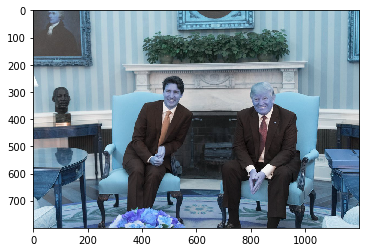

In [74]:
# load the image
pic = "image.jpeg"
image = cv2.imread(pic)
plt.imshow(image)

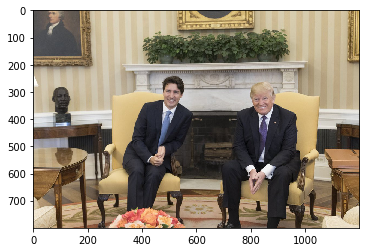

In [75]:
# image processing

# convert the image to RGB colour
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

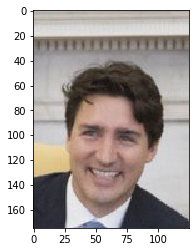

In [76]:
# set dimensions for cropping the image
x, y, width, depth = 450, 200, 125, 175
image_cropped = image_rgb[y:(y+depth), x:(x+width)]
plt.imshow(image_cropped)

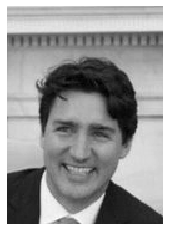

In [77]:
image_template = image_cropped.copy()
image_gray = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)
plt.axis("off")
plt.imshow(image_gray, cmap="gray")

File exists
Faces:
 [[23 71 75 75]]


Text(0.5, 1.0, 'Face Detection')

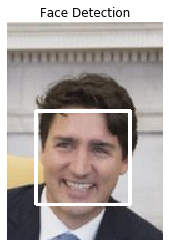

In [78]:
# save face detection algorithm's url in haarcascade_url variable
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

# save face detection algorithm's name as haarcascade
haarcascade = "haarcascade_frontalface_alt2.xml"

# chech if file is in working directory
if (haarcascade in os.listdir(os.curdir)):
    print("File exists")
else:
    # download file from url and save locally as haarcascade_frontalface_alt2.xml, < 1MB
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("File downloaded")

# create an instance of the Face Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)

faces = detector.detectMultiScale(image_gray)

print("Faces:\n", faces)
for face in faces:
#     save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
    # Draw a white coloured rectangle around each face using the face's coordinates
    # on the "image_template" with the thickness of 2 
    cv2.rectangle(image_template,(x,y),(x+w, y+d),(255, 255, 255), 2)

plt.axis("off")
plt.imshow(image_template)
plt.title('Face Detection')

File exists


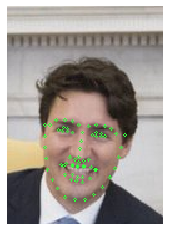

In [79]:
# save facial landmark detection model's url in LBFmodel_url variable
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

# save facial landmark detection model's name as LBFmodel
LBFmodel = "lbfmodel.yaml"

# check if file is in working directory
if (LBFmodel in os.listdir(os.curdir)):
    print("File exists")
else:
    # download picture from url and save locally as lbfmodel.yaml, < 54MB
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")

# create an instance of the Facial landmark Detector with the model
recognizer = cv2.face.LBPHFaceRecognizer_create()
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

# Detect landmarks on "image_gray"
_, landmarks = landmark_detector.fit(image_gray, faces)
for landmark in landmarks:
    for x,y in landmark[0]:
		# display landmarks on "image_cropped"
		# with white colour in BGR and thickness 1
        cv2.circle(image_cropped, (x, y), 1, (50, 255, 60), 1)
plt.axis("off")
plt.imshow(image_cropped)

In [83]:
len(landmarks[0][0])

68